In [8]:
import numpy as np
import tensorflow as tf
import cv2 as cv2
%load_ext autoreload
%autoreload 2
import boxes as bx
import matplotlib.pyplot as plt
import builder as yolo2builder


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# saved = tf.Graph()
# with tf.Session(graph=saved) as sess:
#     tf.saved_model.loader.load(sess, ["serve"], r'D:\Users\yl_gong\Desktop\yolo2m')
#     #print(sess.run(saved.get_tensor_by_name('output:0'),feed_dict={saved.get_tensor_by_name('input:0'):np.random.rand(1,608,608,3)}))
    

In [10]:
saved = tf.Graph()
builder = yolo2builder.GraphBuild(saved,r"D:/githubrepo1/darknet/yolov2.weights")
builder.build()
inp = builder.input
outp = builder.output

In [11]:
#test
orig = cv2.imread(r'D:\githubrepo1\darknet\data\dog.jpg')
img_normalize = bx.img_prep(np.copy(orig))[...,::-1]#reverse channel back to RGB

In [12]:
with saved.as_default():
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    output = sess.run(saved.get_tensor_by_name('output:0'),feed_dict={saved.get_tensor_by_name('input:0'):[img_normalize]})


[0.8471533 0.8227967 0.6849573]


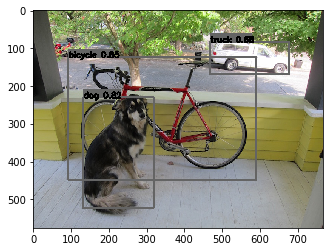

In [13]:
box_coord,box_prob,box_class = bx.getBoxes(np.copy(output[0]))
box_coord,box_prob,box_class = bx.thresholdBox(box_coord,box_prob,box_class,threshold=0.5)
box_coord,box_prob,box_class = bx.nms(box_coord,box_prob,box_class,iou_threshold=0.6,max_box=1000)
box_coord = bx.correct_box(orig,box_coord)
print(box_prob)
img_processed = bx.drawRectangle(np.copy(orig),box_coord,box_prob,box_class)
plt.imshow(img_processed[...,::-1])#reverse channel back to RGB
plt.show()
